Data Analysis on Football

In [1]:
import pandas as pd

# Replace the file path with your actual file path
file_path = "C:/Users/USER/OneDrive/Desktop/data analysis/Python/bigdata/leaguedata.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Add a 'match_id' column with values from 1 to the number of rows
df['match_id'] = range(1, len(df) + 1)

# Display the first few rows of the DataFrame to verify the 'match_id' column
print(df.head())

        Date       Home Team  Home Team Score  Away Team Score  \
0 2022-08-05  Crystal Palace                0                2   
1 2022-08-06     Bournemouth                2                0   
2 2022-08-06         Everton                0                1   
3 2022-08-06          Fulham                2                2   
4 2022-08-06    Leeds United                2                1   

                 Away Team  Country  match_id  
0                  Arsenal  England         1  
1              Aston Villa  England         2  
2                  Chelsea  England         3  
3                Liverpool  England         4  
4  Wolverhampton Wanderers  England         5  


Doing A sample with arsenal to see how well the code works

In [2]:

# Create a list to store DataFrames for home and away teams
dfs = []

# Iterate through the original DataFrame to populate the DataFrames
for index, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    date = row['Date']
    match_id = row['match_id']
    country = row['Country'] 
    
    # Home Team
    home_row = {
        'Date': date,
        'Team': home_team,
        'Goals Scored': row['Home Team Score'],
        'Goals Conceded': row['Away Team Score'],
        'Opponent': away_team,
        'Match ID': match_id,
        'Fixture': 'H',  # Home
        'Country': country  # Add the 'Country' column
    }
    
    # Away Team
    away_row = {
        'Date': date,
        'Team': away_team,
        'Goals Scored': row['Away Team Score'],
        'Goals Conceded': row['Home Team Score'],
        'Opponent': home_team,
        'Match ID': match_id,
        'Fixture': 'A',
        'Country': country  # Add the 'Country' column  # Away
    }
    
    # Append the DataFrames to the list
    dfs.extend([pd.DataFrame([home_row]), pd.DataFrame([away_row])])

# Concatenate the DataFrames into the transformed DataFrame
transformed_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the transformed DataFrame
print(transformed_df)

           Date               Team  Goals Scored  Goals Conceded  \
0    2022-08-05     Crystal Palace             0               2   
1    2022-08-05            Arsenal             2               0   
2    2022-08-06        Bournemouth             2               0   
3    2022-08-06        Aston Villa             0               2   
4    2022-08-06            Everton             0               1   
...         ...                ...           ...             ...   
2097 2023-11-11  Borussia Dortmund             1               2   
2098 2023-11-11             Bochum             1               1   
2099 2023-11-11            Cologne             1               1   
2100 2023-11-10         M'gladbach             4               0   
2101 2023-11-10          Wolfsburg             0               4   

            Opponent  Match ID Fixture  Country  
0            Arsenal         1       H  England  
1     Crystal Palace         1       A  England  
2        Aston Villa         2   

In [3]:
# Define a function to calculate match results and assign points
def calculate_results(row):
    if row['Goals Scored'] > row['Goals Conceded']:
        return ('W', 3)
    elif row['Goals Scored'] < row['Goals Conceded']:
        return ('L', 0)
    else:
        return ('D', 1)

# Apply the function to create 'Result' and 'Points' columns
transformed_df[['Result', 'Points']] = transformed_df.apply(calculate_results, axis=1, result_type='expand')

# Display the updated DataFrame with 'Result' and 'Points' columns
print(transformed_df)
print(transformed_df.columns)


           Date               Team  Goals Scored  Goals Conceded  \
0    2022-08-05     Crystal Palace             0               2   
1    2022-08-05            Arsenal             2               0   
2    2022-08-06        Bournemouth             2               0   
3    2022-08-06        Aston Villa             0               2   
4    2022-08-06            Everton             0               1   
...         ...                ...           ...             ...   
2097 2023-11-11  Borussia Dortmund             1               2   
2098 2023-11-11             Bochum             1               1   
2099 2023-11-11            Cologne             1               1   
2100 2023-11-10         M'gladbach             4               0   
2101 2023-11-10          Wolfsburg             0               4   

            Opponent  Match ID Fixture  Country Result  Points  
0            Arsenal         1       H  England      L       0  
1     Crystal Palace         1       A  England      

In [4]:
# Define a function to map 'Result' to 'Streak' values
def map_result_to_streak(result):
    if result == 'W':
        return 1
    elif result == 'L':
        return 0
    elif result == 'D':
        return 0.5

# Apply the function to create the 'Streak' column
transformed_df['Streak'] = transformed_df['Result'].map(map_result_to_streak)

# Display the updated DataFrame with the 'Streak' column
print(transformed_df)


           Date               Team  Goals Scored  Goals Conceded  \
0    2022-08-05     Crystal Palace             0               2   
1    2022-08-05            Arsenal             2               0   
2    2022-08-06        Bournemouth             2               0   
3    2022-08-06        Aston Villa             0               2   
4    2022-08-06            Everton             0               1   
...         ...                ...           ...             ...   
2097 2023-11-11  Borussia Dortmund             1               2   
2098 2023-11-11             Bochum             1               1   
2099 2023-11-11            Cologne             1               1   
2100 2023-11-10         M'gladbach             4               0   
2101 2023-11-10          Wolfsburg             0               4   

            Opponent  Match ID Fixture  Country Result  Points  Streak  
0            Arsenal         1       H  England      L       0     0.0  
1     Crystal Palace         1       

In [5]:
# Sort the DataFrame by the 'Date' column in ascending order
transformed_df = transformed_df.sort_values(by='Date')

# Initialize a dictionary to keep track of each team's streak
team_streaks = {}

# Initialize an empty list to store the continuous streak values
continuous_streak = []

# Iterate through the sorted DataFrame
for index, row in transformed_df.iterrows():
    team = row['Team']
    result = row['Result']
    
    # Check if the team is in the dictionary
    if team in team_streaks:
        current_streak = team_streaks[team]
    else:
        current_streak = 0
    
    if result == 'W':
        current_streak += 1
    elif result == 'L':
        current_streak = 0  # Reset streak on a loss
    
    # For a draw, don't change the streak
    
    # Update the dictionary with the new streak value
    team_streaks[team] = current_streak
    
    # Append the current streak to the continuous_streak list
    continuous_streak.append(current_streak)

# Add the continuous streak as a new column in the DataFrame
transformed_df['Continuous Streak'] = continuous_streak

# Display the updated DataFrame with the 'Continuous Streak' column
print(transformed_df)


           Date               Team  Goals Scored  Goals Conceded  \
0    2022-08-05     Crystal Palace             0               2   
1    2022-08-05            Arsenal             2               0   
13   2022-08-06        Southampton             1               4   
11   2022-08-06  Nottingham Forest             0               2   
10   2022-08-06          Newcastle             2               0   
...         ...                ...           ...             ...   
2066 2023-11-12              Lazio             0               0   
2067 2023-11-12               Roma             0               0   
2068 2023-11-12        Inter Milan             2               0   
2070 2023-11-12        Gil Vicente             1               1   
2049 2023-11-12    Manchester City             4               4   

               Opponent  Match ID Fixture   Country Result  Points  Streak  \
0               Arsenal         1       H   England      L       0     0.0   
1        Crystal Palace    

Arsenal Games

In [6]:
import pandas as pd
import datetime

# Convert the 'Date' column to datetime objects
transformed_df['Date'] = pd.to_datetime(transformed_df['Date'])

# Define the mapping for points
point_mapping = {'W': 3, 'D': 1, 'L': -1}

# Apply the mapping to create the "Plot Points" column
transformed_df['Plot Points'] = transformed_df['Result'].map(point_mapping)


# Define the start date
start_date = datetime.datetime(2023, 8, 8)

# Filter the DataFrame for Manchester City's games from the start date to the current date
chelsea_games = transformed_df[(transformed_df['Date'] >= start_date) & (transformed_df['Team'] == 'Chelsea')]

# Keep only one match ID per game
chelsea_games = chelsea_games.drop_duplicates(subset='Match ID')

# Display the filtered DataFrame for Manchester City's games
print(chelsea_games)
print(chelsea_games.columns)


           Date     Team  Goals Scored  Goals Conceded           Opponent  \
800  2023-08-13  Chelsea             1               1          Liverpool   
899  2023-08-20  Chelsea             1               3    West Ham United   
948  2023-08-25  Chelsea             3               0              Luton   
1082 2023-09-02  Chelsea             0               1  Nottingham Forest   
1233 2023-09-17  Chelsea             0               0        Bournemouth   
1352 2023-09-24  Chelsea             0               1        Aston Villa   
1545 2023-10-02  Chelsea             2               0             Fulham   
1571 2023-10-07  Chelsea             4               1            Burnley   
1680 2023-10-21  Chelsea             2               2            Arsenal   
1782 2023-10-28  Chelsea             0               2          Brentford   
1983 2023-11-06  Chelsea             4               1  Tottenham Hotspur   
2048 2023-11-12  Chelsea             4               4    Manchester City   

In [7]:
import plotly.express as px

# Create a bar chart for Chelsea's games
fig = px.bar(
    chelsea_games,
    x='Date',
    y='Plot Points',
    title='Chelsea Game Results Based on Points',
    labels={'Date': 'Date', 'Plot Points': 'Points'},
    color='Points',  # Color bars based on points
    color_continuous_scale=['red', 'blue', 'green'],  # Define colors for points
    text='Result',  # Display result labels on hover
    height=400,  # Adjust the chart height
    range_y=[-3, 3]  # Set the y-axis range to include negative values
)

# Define a custom hover template with Date, Points, Result, Goals Scored, Goals Conceded, and Opponent
fig.update_traces(
    hovertemplate="Date: %{x}<br>Points: %{y}<br>Result: %{text}<br>Goals Scored: %{customdata[0]}<br>Goals Conceded: %{customdata[1]}<br>Opponent: %{customdata[2]}"
)

# Add Goals Scored, Goals Conceded, and Opponent as custom data to the plot
fig.data[0].update(customdata=chelsea_games[['Goals Scored', 'Goals Conceded', 'Opponent']])

# Show the chart
fig.show()

Lliga Standings

In [8]:
# Define the start date
start_date = datetime.datetime(2023, 8, 8)

# Filter the DataFrame to include only matches from Spain (La Liga) and after the start date
spain_matches = transformed_df[(transformed_df['Country'] == 'England') & (transformed_df['Date'] >= start_date)]

# Calculate the points, wins, draws, losses, goal scored (GS), goal conceded (GC), and goal difference (GD) for each team
team_stats = {}
for index, row in spain_matches.iterrows():
    team = row['Team']
    result = row['Result']
    goals_scored = row['Goals Scored']
    goals_conceded = row['Goals Conceded']
    
    if team in team_stats:
        team_stats[team]['Points'] += 3 if result == 'W' else 1 if result == 'D' else 0
        if result == 'W':
            team_stats[team]['Wins'] += 1
        elif result == 'D':
            team_stats[team]['Draws'] += 1
        else:
            team_stats[team]['Losses'] += 1
        team_stats[team]['GS'] += goals_scored
        team_stats[team]['GC'] += goals_conceded
    else:
        points = 3 if result == 'W' else 1 if result == 'D' else 0
        wins = 1 if result == 'W' else 0
        draws = 1 if result == 'D' else 0
        losses = 1 if result == 'L' else 0
        team_stats[team] = {
            'Points': points,
            'Wins': wins,
            'Draws': draws,
            'Losses': losses,
            'GS': goals_scored,
            'GC': goals_conceded,
        }

# Calculate the Goal Difference (GD) for each team
for team in team_stats:
    team_stats[team]['GD'] = team_stats[team]['GS'] - team_stats[team]['GC']

# Create a DataFrame for the standings
standings_df = pd.DataFrame(list(team_stats.values()), index=team_stats.keys())
standings_df.index.name = 'Team'
standings_df.reset_index(inplace=True)

# Sort the DataFrame by Points in descending order
standings_df = standings_df.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Display the La Liga standings with Wins, Draws, Losses, Points, GS, GC, and GD
print(standings_df[['Team', 'Wins', 'Draws', 'Losses', 'Points', 'GS', 'GC', 'GD']])


                        Team  Wins  Draws  Losses  Points  GS  GC  GD
0            Manchester City     9      1       2      28  32  12  20
1                    Arsenal     8      3       1      27  26  10  16
2                  Liverpool     8      3       1      27  27  10  17
3          Tottenham Hotspur     8      2       2      26  24  15   9
4                Aston Villa     8      1       3      25  29  17  12
5          Manchester United     7      0       5      21  13  16  -3
6                  Newcastle     6      2       4      20  27  13  14
7   Brighton and Hove Albion     5      4       3      19  25  21   4
8            West Ham United     5      2       5      17  21  22  -1
9                  Brentford     4      4       4      16  19  17   2
10                   Chelsea     4      4       4      16  21  16   5
11   Wolverhampton Wanderers     4      3       5      15  16  20  -4
12            Crystal Palace     4      3       5      15  12  16  -4
13                  

Elo Rating

In [9]:
import pandas as pd

# Assuming 'transformed_df' contains your dataset
# Initialize Elo ratings for all teams
elo_ratings = {team: 1500 for team in transformed_df['Team'].unique()}

# Define the K-factor (you can adjust this based on your preference)
k_factor = 32

# Define a function to calculate expected outcome
def calculate_expected_outcome(team_rating, opponent_rating):
    return 1 / (1 + 10 ** ((opponent_rating - team_rating) / 400))

# Iterate through the matches in your dataset
for index, match in transformed_df.iterrows():
    team = match['Team']
    opponent = match['Opponent']
    result = match['Result']

    # Calculate expected outcomes
    expected_team = calculate_expected_outcome(elo_ratings[team], elo_ratings[opponent])
    expected_opponent = calculate_expected_outcome(elo_ratings[opponent], elo_ratings[team])

    # Update Elo ratings based on the match result
    if result == 'W':
        elo_ratings[team] += k_factor * (1 - expected_team)
        elo_ratings[opponent] += k_factor * (0 - expected_opponent)
    elif result == 'L':
        elo_ratings[team] += k_factor * (0 - expected_team)
        elo_ratings[opponent] += k_factor * (1 - expected_opponent)
    else:  # It's a draw
        elo_ratings[team] += k_factor * (0.5 - expected_team)
        elo_ratings[opponent] += k_factor * (0.5 - expected_opponent)

# After the loop, 'elo_ratings' will contain the updated Elo ratings for each team

# Sort the Elo ratings dictionary by ratings in descending order
sorted_elo_ratings = dict(sorted(elo_ratings.items(), key=lambda item: item[1], reverse=True))

# Display the teams with the highest Elo ratings
top_teams = list(sorted_elo_ratings.keys())[:30]  # Change the number to display more or fewer teams
for team in top_teams:
    print(f'Team: {team}, Elo Rating: {sorted_elo_ratings[team]}')


Team: Manchester City, Elo Rating: 1734.2188106920669
Team: Bayer Leverkusen, Elo Rating: 1700.668432972997
Team: Bayern Munich, Elo Rating: 1694.4508001192714
Team: Liverpool, Elo Rating: 1692.215306601058
Team: Benfica, Elo Rating: 1686.9792698542851
Team: Girona, Elo Rating: 1683.5719814980116
Team: Inter Milan, Elo Rating: 1680.2211176311762
Team: Real Madrid, Elo Rating: 1679.3839033356696
Team: Arsenal, Elo Rating: 1673.7160943838746
Team: Juventus, Elo Rating: 1672.5745748257168
Team: Paris Saint-Germain, Elo Rating: 1663.4664418578461
Team: Sporting CP, Elo Rating: 1656.9417124325219
Team: Barcelona, Elo Rating: 1655.101681893618
Team: Nice, Elo Rating: 1649.1505131619529
Team: Aston Villa, Elo Rating: 1648.1858309855415
Team: Atletico Madrid, Elo Rating: 1635.5514895086349
Team: Manchester United, Elo Rating: 1608.1347621911484
Team: Braga, Elo Rating: 1606.3707737939644
Team: Newcastle, Elo Rating: 1605.4406737656093
Team: FC Porto, Elo Rating: 1603.0770930235326
Team: Totten

In [10]:
# Convert Elo ratings to a DataFrame
elo_ratings_df = pd.DataFrame(list(elo_ratings.items()), columns=['Team', 'Elo Rating'])
print(elo_ratings)

{'Crystal Palace': 1472.531632886228, 'Arsenal': 1673.7160943838746, 'Southampton': 1295.2230120654244, 'Nottingham Forest': 1464.1815646902223, 'Newcastle': 1605.4406737656093, 'Wolverhampton Wanderers': 1503.3233196783046, 'Leeds United': 1317.7544108800473, 'Tottenham Hotspur': 1595.0258080578471, 'Fulham': 1438.1305007354233, 'Chelsea': 1518.1365564837488, 'Everton': 1485.7812263075984, 'Aston Villa': 1648.1858309855415, 'Bournemouth': 1393.7712490667006, 'Liverpool': 1692.215306601058, 'Manchester City': 1734.2188106920669, 'West Ham United': 1480.704984482343, 'Brighton and Hove Albion': 1546.48106327031, 'Manchester United': 1608.1347621911484, 'Leicester City': 1401.936140837872, 'Brentford': 1536.4956075983264, 'Valencia': 1492.4587165212436, 'Sevilla': 1474.4220974623265, 'Rayo Vallecano': 1530.360303640463, 'Almeria': 1292.887449409348, 'Famalicao': 1505.24464708609, 'Nice': 1649.1505131619529, 'Lille': 1570.6969675568905, 'Burnley': 1320.5955857663373, 'Braga': 1606.3707737

In [11]:
# Filter the DataFrame to include only teams from England
england_teams = transformed_df[transformed_df['Country'] == 'Spain']

# Group the England teams by 'Team' and calculate the mean of 'Goals Scored' and 'Goals Conceded'
average_goals_england = england_teams.groupby('Team')[['Goals Scored', 'Goals Conceded']].mean()

# Sort the DataFrame by average goals scored in descending order
average_goals_england = average_goals_england.sort_values(by='Goals Scored', ascending=False)

# Print the result
print(average_goals_england)


                 Goals Scored  Goals Conceded
Team                                         
Atletico Madrid      2.416667        1.000000
Girona               2.384615        1.230769
Real Madrid          2.153846        0.692308
Barcelona            2.000000        1.000000
Athletic Bilbao      1.923077        1.307692
Real Sociedad        1.769231        1.230769
Sevilla              1.500000        1.416667
Granada              1.384615        2.307692
Villarreal           1.384615        1.846154
Real Betis           1.307692        1.230769
Valencia             1.230769        1.384615
Getafe               1.153846        1.307692
Almeria              1.153846        2.692308
Osasuna              1.153846        1.615385
Rayo Vallecano       1.153846        1.307692
Celta Vigo           1.076923        1.846154
Real Mallorca        1.000000        1.500000
Alaves               0.846154        1.384615
Las Palmas           0.846154        0.923077
Cadiz                0.833333     

In [12]:
# Create a function to calculate head-to-head statistics
def calculate_head_to_head_stats(data):
    # Create a dictionary to store head-to-head statistics
    head_to_head_stats = {}

    for index, row in data.iterrows():
        team = row['Team']
        opponent = row['Opponent']
        goals_scored = row['Goals Scored']

        # Check if this is the first encounter between the teams
        if team not in head_to_head_stats:
            head_to_head_stats[team] = {}
        if opponent not in head_to_head_stats[team]:
            head_to_head_stats[team][opponent] = []

        # Append the goals scored by the team in this match
        head_to_head_stats[team][opponent].append(goals_scored)

    return head_to_head_stats

# Apply the function to your DataFrame
head_to_head_stats = transformed_df.groupby(['Team', 'Opponent']).apply(calculate_head_to_head_stats)

# Display the head-to-head statistics
print(head_to_head_stats)


Team                     Opponent           
1. FC Heidenheim 1846    1. FC Union Berlin     {'1. FC Heidenheim 1846': {'1. FC Union Berlin...
                         Bayer Leverkusen       {'1. FC Heidenheim 1846': {'Bayer Leverkusen':...
                         Bayern Munich          {'1. FC Heidenheim 1846': {'Bayern Munich': [2]}}
                         Borussia Dortmund      {'1. FC Heidenheim 1846': {'Borussia Dortmund'...
                         Eintracht Frankfurt    {'1. FC Heidenheim 1846': {'Eintracht Frankfur...
                                                                      ...                        
Wolverhampton Wanderers  Nottingham Forest      {'Wolverhampton Wanderers': {'Nottingham Fores...
                         Sheffield United       {'Wolverhampton Wanderers': {'Sheffield United...
                         Southampton            {'Wolverhampton Wanderers': {'Southampton': [1...
                         Tottenham Hotspur      {'Wolverhampton Wanderers

In [13]:
transformed_df = pd.merge(transformed_df, elo_ratings_df, on='Team', how='left')

# Now you have Elo Ratings associated with the respective teams in your 'transformed_df' DataFrame.
# Calculate opponent strength based on Elo ratings
print(transformed_df.columns)



Index(['Date', 'Team', 'Goals Scored', 'Goals Conceded', 'Opponent',
       'Match ID', 'Fixture', 'Country', 'Result', 'Points', 'Streak',
       'Continuous Streak', 'Plot Points', 'Elo Rating'],
      dtype='object')


In [14]:
# Calculate opponent strength based on Elo ratings
transformed_df['Opponent_Strength'] = transformed_df.groupby('Date')['Elo Rating'].transform('mean')

# Display the DataFrame with opponent strength
print(transformed_df[['Date', 'Team', 'Opponent', 'Elo Rating', 'Opponent_Strength']])


           Date               Team           Opponent   Elo Rating  \
0    2022-08-05     Crystal Palace            Arsenal  1472.531633   
1    2022-08-05            Arsenal     Crystal Palace  1673.716094   
2    2022-08-06        Southampton  Tottenham Hotspur  1295.223012   
3    2022-08-06  Nottingham Forest          Newcastle  1464.181565   
4    2022-08-06          Newcastle  Nottingham Forest  1605.440674   
...         ...                ...                ...          ...   
2097 2023-11-12              Lazio               Roma  1539.374358   
2098 2023-11-12               Roma              Lazio  1542.073700   
2099 2023-11-12        Inter Milan          Frosinone  1680.221118   
2100 2023-11-12        Gil Vicente            Rio Ave  1431.253512   
2101 2023-11-12    Manchester City            Chelsea  1734.218811   

      Opponent_Strength  
0           1573.123864  
1           1573.123864  
2           1496.430788  
3           1496.430788  
4           1496.430788  
...

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1300298048.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_15716\1300298048.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



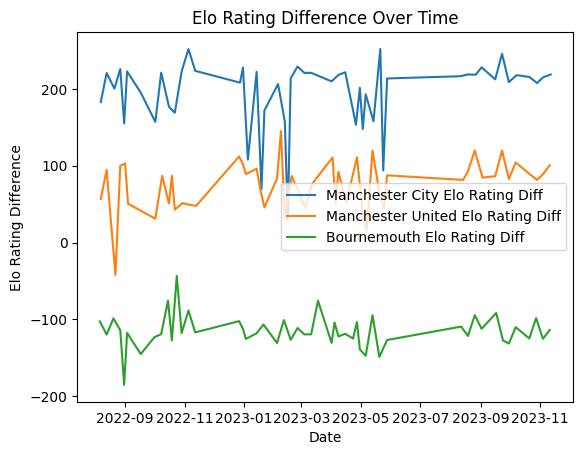

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame for 'Manchester City,' 'Manchester United,' and 'Bournemouth'
selected_teams = ['Manchester City', 'Manchester United', 'Bournemouth']
filtered_df = transformed_df[transformed_df['Team'].isin(selected_teams)]

# Calculate the Elo Rating Difference
filtered_df['Elo_Rating_Diff'] = filtered_df['Elo Rating'] - filtered_df['Opponent_Strength']

# Calculate the Average Elo Rating Difference over time
filtered_df['Average_Elo_Rating_Diff'] = filtered_df.groupby('Team')['Elo_Rating_Diff'].expanding().mean().reset_index()['Elo_Rating_Diff']

# Create a line chart
for team in selected_teams:
    team_data = filtered_df[filtered_df['Team'] == team]
    plt.plot(team_data['Date'], team_data['Elo_Rating_Diff'], label=f'{team} Elo Rating Diff')

plt.xlabel('Date')
plt.ylabel('Elo Rating Difference')
plt.title('Elo Rating Difference Over Time')
plt.legend()
plt.show()


In [16]:
import math

def calculate_win_probability(team_elo, opponent_elo):
    elo_difference = opponent_elo - team_elo
    win_probability = 1 / (1 + math.pow(10, elo_difference / 400))
    return win_probability

# Assuming your DataFrame is named 'transformed_df'
transformed_df['Win_Prob_Home'] = transformed_df.apply(
    lambda row: calculate_win_probability(row['Elo Rating'], row['Opponent_Strength']),
    axis=1
)

transformed_df['Win_Prob_Away'] = transformed_df.apply(
    lambda row: calculate_win_probability(row['Opponent_Strength'], row['Elo Rating']),
    axis=1
)

print(transformed_df[['Date', 'Team', 'Opponent', 'Elo Rating', 'Opponent_Strength', 'Win_Prob_Home', 'Win_Prob_Away']])

           Date               Team           Opponent   Elo Rating  \
0    2022-08-05     Crystal Palace            Arsenal  1472.531633   
1    2022-08-05            Arsenal     Crystal Palace  1673.716094   
2    2022-08-06        Southampton  Tottenham Hotspur  1295.223012   
3    2022-08-06  Nottingham Forest          Newcastle  1464.181565   
4    2022-08-06          Newcastle  Nottingham Forest  1605.440674   
...         ...                ...                ...          ...   
2097 2023-11-12              Lazio               Roma  1539.374358   
2098 2023-11-12               Roma              Lazio  1542.073700   
2099 2023-11-12        Inter Milan          Frosinone  1680.221118   
2100 2023-11-12        Gil Vicente            Rio Ave  1431.253512   
2101 2023-11-12    Manchester City            Chelsea  1734.218811   

      Opponent_Strength  Win_Prob_Home  Win_Prob_Away  
0           1573.123864       0.359150       0.640850  
1           1573.123864       0.640850       0.

In [17]:
import pandas as pd

# Group all teams by 'Team' and calculate the mean of 'Goals Scored' and 'Goals Conceded' for each team
average_goals_all_countries = transformed_df.groupby('Team')[['Goals Scored', 'Goals Conceded']].mean()

# Sort the DataFrame by average goals scored in descending order
average_goals_all_countries = average_goals_all_countries.sort_values(by='Goals Scored', ascending=False)

# Rename the columns for clarity
average_goals_all_countries = average_goals_all_countries.rename(columns={'Goals Scored': 'Average_Goals_Scored', 'Goals Conceded': 'Average_Goals_Conceded'})

# Merge the average goals DataFrame with 'transformed_df' based on the 'Team' column
transformed_df = transformed_df.merge(average_goals_all_countries, left_on='Team', right_index=True)

# Group all teams by 'Opponent' and calculate the mean of 'Goals Scored' and 'Goals Conceded' for each opponent
average_goals_opponent = transformed_df.groupby('Opponent')[['Goals Scored', 'Goals Conceded']].mean()

# Rename the columns for clarity
average_goals_opponent = average_goals_opponent.rename(columns={'Goals Scored': 'Average_Goals_Scored_Opponent', 'Goals Conceded': 'Average_Goals_Conceded_Opponent'})

# Merge the opponent's average goals DataFrame with 'transformed_df' based on the 'Opponent' column
transformed_df = transformed_df.merge(average_goals_opponent, left_on='Opponent', right_index=True)


In [18]:
transformed_df['Team'] = transformed_df['Team'].str.replace(" ", "")
transformed_df['Opponent'] = transformed_df['Opponent'].str.replace(" ", "")

print(transformed_df.Opponent)

0         Arsenal
539       Arsenal
946       Arsenal
229       Arsenal
613       Arsenal
          ...    
954     Stuttgart
1494    Stuttgart
1296    Stuttgart
1719    Stuttgart
1229    Stuttgart
Name: Opponent, Length: 2102, dtype: object


Model Prediction

In [19]:
# Assuming you have columns for "Goals Scored" and "Goals Conceded" in your DataFrame
transformed_df['TotalGoals'] = transformed_df['Goals Scored'] + transformed_df['Goals Conceded']



In [20]:
# Define the file path for the output Excel file
output_file_path = "C:/Users/USER/OneDrive/Desktop/data analysis/Python/bigdata/transformed_data.xlsx"

# Export the DataFrame to an Excel file
transformed_df.to_excel(output_file_path, index=False)

print(f"DataFrame has been exported to {output_file_path}")


DataFrame has been exported to C:/Users/USER/OneDrive/Desktop/data analysis/Python/bigdata/transformed_data.xlsx


In [21]:
# Replace 'file_path' with the actual path to your Excel file
file_path = "C:/Users/USER/OneDrive/Desktop/data analysis/Python/bigdata/transformed_data.xlsx"
data = pd.read_excel(file_path)

print(data.columns)

Index(['Date', 'Team', 'Goals Scored', 'Goals Conceded', 'Opponent',
       'Match ID', 'Fixture', 'Country', 'Result', 'Points', 'Streak',
       'Continuous Streak', 'Plot Points', 'Elo Rating', 'Opponent_Strength',
       'Win_Prob_Home', 'Win_Prob_Away', 'Average_Goals_Scored',
       'Average_Goals_Conceded', 'Average_Goals_Scored_Opponent',
       'Average_Goals_Conceded_Opponent', 'TotalGoals'],
      dtype='object')


Modeling


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Select only the columns you need in X
X = data[['Average_Goals_Scored', 'Average_Goals_Conceded', 'Elo Rating', 'Opponent_Strength','Average_Goals_Scored_Opponent','Average_Goals_Conceded_Opponent' ]]

y = data['TotalGoals']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.959297709026128


In [23]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'model')

['model']

In [24]:
# Print feature importances
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Feature Importances:
Average_Goals_Scored: 0.1434875311658026
Average_Goals_Conceded: 0.12268261084259613
Elo Rating: 0.10932641014579776
Opponent_Strength: 0.296366002724448
Average_Goals_Scored_Opponent: 0.1545279816953831
Average_Goals_Conceded_Opponent: 0.17360946342597244


In [25]:
# Replace 'file_path' with the actual path to your Excel file
file_path = "C:/Users/USER/OneDrive/Desktop/data analysis/Python/bigdata/transformed_data.xlsx"
transformed_data = pd.read_excel(file_path)

In [26]:
# Columns to be used for prediction
selected_columns = [
    'Average_Goals_Scored', 'Average_Goals_Conceded', 'Elo Rating',
]

# Create DataFrames for each team (replace 'Arsenal' and 'Luton' with the actual team names)
team1_data = transformed_df[transformed_df['Team'] == 'Arsenal'][selected_columns]
team2_data = transformed_df[transformed_df['Team'] == 'Liverpool'][selected_columns]

# Ensure only unique columns are included
team1_data = team1_data.loc[:, ~team1_data.columns.duplicated()]
team2_data = team2_data.loc[:, ~team2_data.columns.duplicated()]

# Replace Elo Rating for Team 2 with Opponent Strength
team2_data['Opponent_Strength'] = team2_data['Elo Rating'].mean()
team2_data.drop(['Elo Rating'], axis=1, inplace=True)

# Rename columns for Team 2
team2_data.columns = ['Average_Goals_Scored_Opponent', 'Average_Goals_Conceded_Opponent', 'Opponent_Strength']


# Concatenate the input data for both teams
input_data = pd.concat([team1_data.mean(), team2_data.mean()]).to_frame().T

# Print the input_data
print(input_data)



   Average_Goals_Scored  Average_Goals_Conceded   Elo Rating  \
0                  2.28                    1.06  1673.716094   

   Average_Goals_Scored_Opponent  Average_Goals_Conceded_Opponent  \
0                           2.04                             1.14   

   Opponent_Strength  
0        1692.215307  


In [27]:
import joblib

# Load the trained model
model = joblib.load('model')

# Make the prediction
predicted_total_goals = model.predict(input_data)

# Set a lower limit of -1.2
predicted_total_goals = max(predicted_total_goals[0] - 1.2, 0)  # Adjust the lower limit as needed

# Print the predicted total goals
print("Predicted Total Goals:", predicted_total_goals)

# Assuming you have calculated the sum of average goals scored and average goals scored by the opponent
sum_of_goals = input_data['Average_Goals_Scored'].values[0] + input_data['Average_Goals_Scored_Opponent'].values[0]

# Check if the sum is greater than the predicted total goals
if sum_of_goals > predicted_total_goals:
    prediction_result = "Over 2.5"
else:
    prediction_result = "Not Certain"

# Print the prediction result
print("Prediction Result:", prediction_result)




Predicted Total Goals: 3.17
Prediction Result: Over 2.5


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

